In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import tensorflow as tf


In [26]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
train=train.flow_from_directory('/content/drive/My Drive/Colab Notebooks/Final_leaf/train',
                                target_size=(200,200), 
                                batch_size=3, 
                                class_mode='binary')

Found 441 images belonging to 2 classes.


In [29]:
validation=validation.flow_from_directory('/content/drive/My Drive/Colab Notebooks/Final_leaf/test', 
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='binary')

Found 84 images belonging to 2 classes.


In [30]:
train.class_indices

{'disease': 0, 'no_disease': 1}

In [31]:
train.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [32]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512, activation='relu'),
                                  tf.keras.layers.Dense(1, activation='softmax')
                                  
])

In [33]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [34]:
model_fit=model.fit(train,
                    steps_per_epoch=50,
                    epochs=10,
                    validation_data=validation)

Epoch 1/10
50/50 [==============================] - 43s 865ms/step - loss: 4.9814 - accuracy: 0.6733 - val_loss: 6.1723 - val_accuracy: 0.5952
Epoch 2/10
50/50 [==============================] - 43s 859ms/step - loss: 3.2532 - accuracy: 0.7867 - val_loss: 6.1723 - val_accuracy: 0.5952
Epoch 3/10
50/50 [==============================] - 44s 880ms/step - loss: 3.3548 - accuracy: 0.7800 - val_loss: 6.1723 - val_accuracy: 0.5952
Epoch 4/10
50/50 [==============================] - 42s 833ms/step - loss: 3.1515 - accuracy: 0.7933 - val_loss: 6.1723 - val_accuracy: 0.5952
Epoch 5/10
50/50 [==============================] - 45s 904ms/step - loss: 4.7781 - accuracy: 0.6867 - val_loss: 6.1723 - val_accuracy: 0.5952
Epoch 6/10
50/50 [==============================] - 44s 885ms/step - loss: 3.8631 - accuracy: 0.7467 - val_loss: 6.1723 - val_accuracy: 0.5952
Epoch 7/10
50/50 [==============================] - 43s 860ms/step - loss: 4.3714 - accuracy: 0.7133 - val_loss: 6.1723 - val_accuracy: 0.5952

In [35]:
validation.class_indices

{'disease': 0, 'no_disease': 1}

In [44]:
dir_path='/content/drive/My Drive/Colab Notebooks/testing_images'

for i in os.listdir(dir_path):
  img=image.load_img(dir_path+'//'+i, target_size=(200,200))
  #plt.imshow(img)
  #plt.show()

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images=np.vstack([x])
  val=model.predict(images)

  print(val)
 

[[1.]]
[[1.]]


In [ ]:
model.save('model_saved.h5') 

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
model= load_model('model_saved.h5')

ValueError: ignored

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving bean_rust_test.0.jpg to bean_rust_test.0.jpg


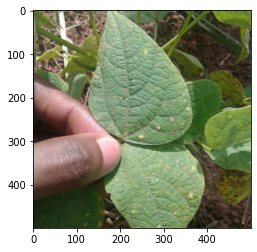

In [ ]:
new_image=plt.imread('bean_rust_test.0.jpg')
img=plt.imshow(new_image)

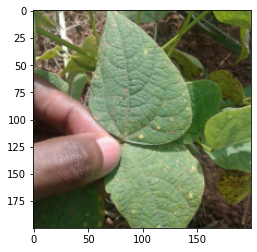

In [ ]:
from skimage.transform import resize
resized_image=resize(new_image, (200,200))
#img=plt.imshow(resized_image)